# Bayesian Inference

- Bayes theorem

- prior distribution

- likelihood

- posterior distribution

- conjugate prior


## Bayes theorem

## $$P(\theta |x) = \frac { P(\theta ) P(x|\theta ) }{ P(x) } $$

확률을 주관적으로 해석하는 관점으로 이해하시는 분들이 많습니다. 물론 틀린 말은 아니지만, 개인적으로 베이즈 통계를 정확히 이해하기 위한 좋은 출발점은 아니라는 것이 필자의 생각입니다. 베이즈 통계 역시 **확률의 공리**를 철저히 따릅니다. 다만 다른 점이 있다면, 그것은 확률의 공리 다음으로 위의 식, 바로 **베이즈 정리**를 철저하게 따른다는 점입니다.

위 베이즈 정리의 내용을 하나씩 풀어보겠습니다.

> $P(x|\theta)$ : 가능도(Likelihood)는 어떤 모수가 주어졌을 때, 관측치 $x$가 나타날 확률을 말합니다. 예를 들어, 동전의 앞면이 나올 확률이 0.5라 한다면, 이때 앞면이 100번 나올 확률은 ${P(x=1|\theta=0.5)}^{100}$ 로 표현이 됩니다. 

> $P(x)$ : 증거(Evidence)는 모든 $\theta$에 대해 관측치 $x$가 나타날 확률을 말합니다. 개인적으로 이 확률에 대한 이해가 조금 까다롭게 여겨집니다.(사실 아직 완전히 이해한 것은 아닙니다. 계속 같이 공부해요~)

> $P(\theta)$ : 사전분포(Prior distribution)는 $\theta$에 대한 확률을 의미합니다. 눈치 채신 분도 있겠습니다. 베이즈 통계에서는 빈도 통계에서 **어떤 모집단의 미지의 상수라 정의하는 모수**를 **확률변수**로 봅니다. 베이즈 통계에서 주관적인 확률이라 여겨지는 부분이 바로 이 부분입니다.

> $P(\theta|x)$ : 사후분포(Posterior distribution)는 관측치 $x$가 주어졌을 때 $\theta$에 대한 확률분포를 말합니다. 즉 앞서 정의된 사전분포가 데이터의 영향을 받아 바뀌게 되는 분포를 말합니다. 

## 사전분포(Prior distribution)

동전의 앞면이 나올 확률을 $\theta$라 하겠습니다. 이전까지는 $\theta$에 대한 확률을 **0.5**라고 여겨왔으나, 잠시 그런 생각은 접어둡시다. 어렵다면, 어떤 마법의 성에서 나온 동전이라 취급해봅시다. 이때 여러분은 실제로 동전을 던져 확률이 어떤지 실험을 하기 전에 $\theta$에 대한 분포를 미리 생각해볼 수 있습니다. 밑에 $\theta$에 대한 두 가지 분포를 그려보았습니다. 이를 사전분포(Prior distribution)이라 합니다.

### 1) Uninformative prior distribution : $\theta$ ~ Unif(0, 1)
- 주의 : $\theta$는 확률을 나타내는 확률변수로 0과 1사이에 있어야 합니다!

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# 0부터 1사이에서 5000개의 랜덤샘플을 뽑습니다.
s = np.random.uniform(0,1,5000)

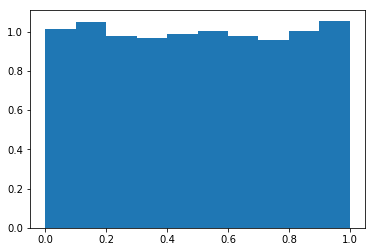

In [11]:
plt.hist(s,bins=10,normed=True)
plt.show()

왜 균일분포(Uniform distribution)를 Uninformative한 분포라 부르는지 감이 조금 오실지 모르겠습니다. 왜냐하면 $\theta$가 0~1사이의 어떤 값이든 고루 갖을 가능성을 보여주기 때문입니다. 이는 $\theta$가 어떤 값이든 가질 수 있다는 것이므로, 우리에게 $\theta$에 대한 특별한 정보를 준다고 볼 수 없습니다. 따라서 균일분포를 **Uninformative prior**라 부릅니다.

### 2) Beta prior distribution : $\theta$ ~ Beta($\alpha$, $\beta$)
- Beta분포는 두 개의 shape paramters, $\alpha$, $\beta$로 결정됩니다. 
- $\int _{ 0 }^{ 1 }{ \frac { \Gamma (\alpha +\beta ) }{ \Gamma (\alpha )\Gamma (\beta ) } { x }^{ \alpha -1 }{ (1-x) }^{ \beta -1 }dx\quad =\quad 1 }$
- $0<x<1$, **Beta분포의 support**라고 합니다. Beta의 support가 0과 1사이기 때문에 Beta분포를 **'확률'**에 대한 prior distribution으로 사용할 수 있습니다.
- $\Gamma(\alpha)=(\alpha-1)!$

In [12]:
from scipy.stats import beta

- $\alpha$, $\beta$가 모두 2일 때의 히스토그램을 그려보았습니다.

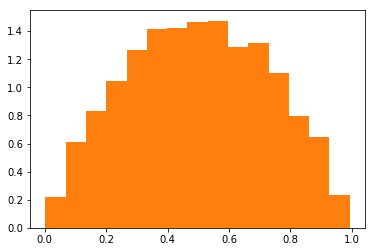

In [17]:
a=2 ; b=2
r=beta.rvs(a,b,size=5000)
plt.hist(r,bins=15,normed=True)
plt.show()

$\theta$의 분포가 0.5를 기준으로 좌우 대칭인 것을 확인할 수 있습니다. $\alpha$, $\beta$를 다르게 하면 모양이 어떻게 바뀔까요?

$\alpha$=10, $\beta$=2 일 때의 히스토그램입니다.

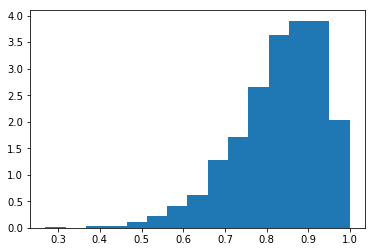

In [26]:
a=10 ; b=2
r=beta.rvs(a,b,size=5000)
plt.hist(r,bins=15,normed=True)
plt.show()

$\theta$의 분포가 0.9즈음에서 봉우리를 형성하는 것을 볼 수 있습니다. 

이외에도 다양한 **$\alpha$, $\beta$를 고려함으로써, 확률 $\theta$에 대한 여러가지 사전분포**를 상상할 수 있겠습니다.

우선 시작으로 위 두 가지의 사전분포로 시작하는 것이 좋을 것 같습니다. 다음은 $Likelihood$입니다.

## 가능도(Likelihood)

$\theta$에 대한 사전분포로 Uninformative prior를 정한 뒤, 동전 던지기 실험을 해본 결과 1000번 중 100번 앞면이 나왔다고 합시다. 이때 Bayes therom에서 보았던 $P(x|\theta)$는 어떻게 표현될까요?  

#### $$P(x|\theta)=\left( \begin{matrix} 1000 \\ 100 \end{matrix} \right) { \theta  }^{ 100 }{ (1-\theta ) }^{ 900 }$$

- $x$는 1000번 중 앞면이 나온 횟수
- $\theta$는 앞면이 나올 확률

으로 표현되지 않겠습니까? 이때 보통 조합의 경우의 수 부분을 제거한 " ${ \theta  }^{ 100 }{ (1-\theta ) }^{ 900 }$ "을 **$\theta$에 대한 $likelihood$**라 부릅니다. ($likelihood$의 정확한 정의는 결합확률(joint probability)입니다.) 그리고 이것은 성공횟수가 100일때, 즉 $x$=100일때  $\theta$에 대한 함수인 것을 확인할 수 있을 겁니다. 

이를 다시 쓰면 $$L(\theta|x=100) = { \theta  }^{ 100 }{ (1-\theta ) }^{ 900 }$$ 로 표현할 수 있습니다. 의미로는 $x$가 주어졌을 때의 $\theta$에 대한 함수(혹은 가능도)입니다.

## 증거(Evidence)

오로지 $x$에 대한 확률만을 의미하는 $P(x)$는 베이즈 통계에서 evidence라 불리웁니다.(왜 인지는 아직 잘 모르겠습닏;;) 이 확률은 다음과 같이 구할 수 있습니다.

####  $$ P(x)=\sum _{ \forall  \theta  }^{  }{ P(x,\theta ) } =\sum _{ \forall  \theta  }^{  }{ P(\theta )P(x|\theta ) } $$

이는 서로 배타적인 모든 $\theta$에 대해 $x$가 발생할 확률을 모두 더하는 것과 같은 의미입니다. 흠.. 아마추어적인 해석을 해본다면.. $\theta$에 무관하게 관측치 $x$가 나타날 확률을 의미하는 것 같습니다.

## 사후분포(Posterior distribution)
###  prior distribution ~ uniform distribution

앞에서 언급했던 예제로 다시 돌아가봅시다. 동전이 앞면을 보일 확률에 대한 분포를 $\theta$~unif(0,1), 즉 Uninformative한 사전분포로 주었습니다. 이 상황에서 동전을 1000번 던진 결과, 겨우 100번의 앞면이 나왔다고 합시다. 직관적으로 여러분은 이때 이 동전이 앞면을 보일 확률을 0.1이라 예상할 수 있을 겁니다. 위 상황을 자세하게 풀어보겠습니다.

#### $$ P(\theta |x=100)=\frac { P(\theta )P(x=100|\theta ) }{ P(x=100) } \quad \propto \quad P(\theta )L(x=100|\theta )\quad =\quad 1*{ \theta  }^{ 100 }{ (1-\theta ) }^{ 900 }\quad =\quad { \theta  }^{ 100 }{ (1-\theta ) }^{ 900 }\quad  $$

$$ P(\theta |x=100) \propto  { \theta  }^{ 100 }{ (1-\theta ) }^{ 900 } $$

- $\theta$~Unif(0,1)의 확률밀도함수는 $P(\theta)=1$입니다.


아마 저기 위에 비례식이 걸리적 거릴 것 같습니다만, 괜찮습니다. 왜일까요? $x$가 주어졌다는 것은 더 이상 $x$를 확률변수가 아닌 상수로 본다는 의미이기 때문입니다. 

자 그럼 위의 $ { \theta  }^{ 100 }{ (1-\theta ) }^{ 900 }$ 을 확률밀도함수로 볼 수 있을까요? 그럴 수 없습니다. 왜냐하면 $\int _{ 0 }^{ 1 }{ { \theta  }^{ 100 }{ (1-\theta ) }^{ 900 }d\theta \neq 1 } $이기 때문입니다. 확률의 공리를 위배하지요. 큰 문제로 보일 수 있겠습니다만, 이를 조정해주는 상수로 나누어주기만 하면 이 문제는 곧 해결됩니다. 이 문제는 **Beta분포**의 분모를 찾으므로써 쉽게 해결할 수 있습니다.

### $$P(\theta|x=100)=\frac { \Gamma (1002) }{ \Gamma (101)\Gamma (901) } { \theta  }^{ 101-1 }{ (1-\theta ) }^{ 901-1 }$$

### $${ \theta  }_{ |x=100 }\sim Beta(101,\quad 901)$$

따라서 동전이 앞면을 보일 확률에 대한 사후분포가 **Beta분포**를 따르는 것을 확인할 수 있습니다.

###  prior distribution ~ Beta distribution,   $\alpha$=2, $\beta$=2 인 경우


이번엔 사전분포를 균일분포가 아닌 베타분포인 상황을 보겠습니다. 즉 앞면을 보일 확률에 대한 사전분포를 $\theta$~Beta($\alpha$,$\beta$)로 주었습니다. 이때의 사후분포를 구해보겠습니다.


#### $$ P(\theta |x=100)=\frac { P(\theta )P(x=100|\theta ) }{ P(x=100) } \quad \propto \quad P(\theta )L(x=100|\theta )\quad =\quad \frac { \Gamma (1+1) }{ \Gamma (1)\Gamma (1) } { \theta  }^{ 2-1 }{ (1-\theta ) }^{ 2-1 }*{ \theta  }^{ 100 }{ (1-\theta ) }^{ 900 }\quad =\quad { \theta  }^{ 101 }{ (1-\theta ) }^{ 901 }\quad  $$

$$ P(\theta |x=100) \propto  { \theta  }^{ 101 }{ (1-\theta ) }^{ 901 } $$

위와 마찬가지로 확률의 공리를 만족하도록 하는 상수를 고려해주면 다음과 같은 사후분포 확률함수를 떠올릴 수 있습니다.

### $$P(\theta|x=100)=\frac { \Gamma (1004) }{ \Gamma (102)\Gamma (902) } { \theta  }^{ 102-1 }{ (1-\theta ) }^{ 902-1 }$$

### $${ \theta  }_{ |x=100 }\sim Beta(102,\quad 902)$$

따라서 동전이 앞면을 보일 확률의 사후분포가 사전분포와 같은 분포인 **Beta분포**를 따르는 것을 확인할 수 있습니다.

- 사실 unif(0,1)분포는 Beta(1,1)과 수학적으로 같은 분포입니다.

- 사전분포와 사후분포가 같은 분포를 가질 때 이를 **공액분포(conjugate distribution)**라 합니다. 대표적인 공액분포로 $Beta$, $Gamma$ 분포 등이 있습니다.

- 사후분포의 모수의 별 차이가 나질 않는 것 같군요. 그래프로 사전분포를 균일분포로 주었을 때와 베타분포로 주었을 때의 차이를 비교해보겠습니다.

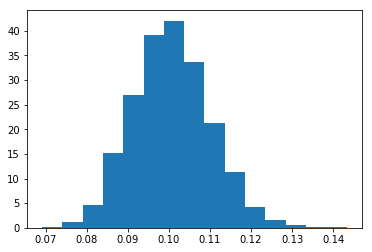

In [31]:
# 사전분포가 균일분포인 경우입니다.
a=101 ; b=901
r=beta.rvs(a,b,size=5000)
plt.hist(r,bins=15,normed=True)
plt.show()

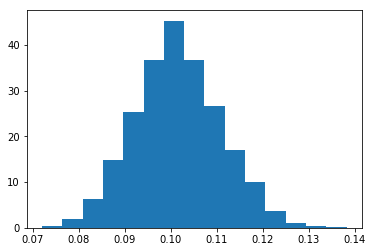

In [32]:
# 사전분포가 Beta(2,2)인 경우입니다.
a=102 ; b=902
r=beta.rvs(a,b,size=5000)
plt.hist(r,bins=15,normed=True)
plt.show()

두 경우 모두 0.10을 기준으로 상당한 좌우대칭을 보입니다. 이는 prior에 비해 데이터의 결과가 더 강하기 때문입니다. 예시를 조금 수정해보겠습니다. 이번엔 동전을 10번 던져 2번만 앞면이 나왔다고 합시다. 이때 두 개의 사전분포, 균일분포와 Beta(5,5)분포에 대한 사후분포를 그려보겠습니다. 

- 균일 사전분포에 대한 사후분포

${ \theta  }_{ |x=10 }\sim Beta(2+1,\quad 8+1)$

- 베타 사전분포에 대한 사후분포

${ \theta  }_{ |x=10 }\sim Beta(2+5,\quad 8+5)$

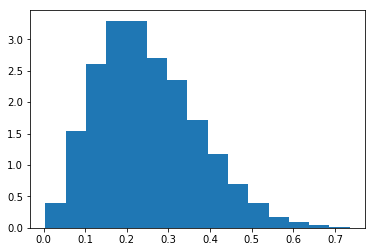

In [33]:
# 사전분포가 Beta(2,2)인 경우입니다.
a=3 ; b=9
r=beta.rvs(a,b,size=5000)
plt.hist(r,bins=15,normed=True)
plt.show()

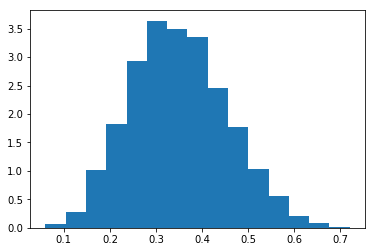

In [34]:
# 사전분포가 Beta(2,2)인 경우입니다.
a=7 ; b=13
r=beta.rvs(a,b,size=5000)
plt.hist(r,bins=15,normed=True)
plt.show()

이번엔 두 사후분포가 상당히 다르다는 것을 볼 수 있습니다. 

왜 이러한 차이가 발생할까요?

#### Beta분포의 모수 $\alpha$와 $\beta$ 가 의미적으로 성공과 실패를 나타내기 때문입니다.

- Prior : $\theta \sim Beta(\alpha,\beta)$
- Data : **# of success = a, # of failures = b**
- Posterior : ${ \theta  }_{ |x=a+b }\sim Beta(a+\alpha,\quad b+\beta)$

따라서 prior의 모수를 어떻게 설정하느냐에 따라 사후분포가 크게 좌우될 수 있습니다. 사전분포를 주관적으로 선택할 수 있다는 부분이 베이지안 통계의 약점으로 작용할 수 있습니다만, 데이터의 크기가 충분하다면 이는 큰 문제가 되지 않습니다. 이런 상황을 Data가 dominate한다고 합니다.

다음은 사전분포, 가능도, 사후분포의 히스토그램을 한 번에 그려본 것입니다. 이것만 눈에 들어오면 됩니다. **사전분포가 가능도에 의해 갱신된 것이 사후분포**이다.

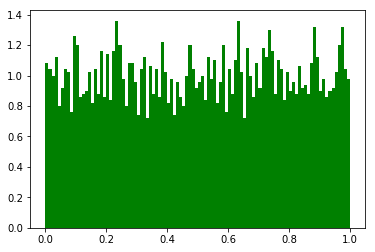

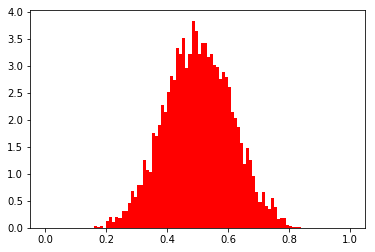

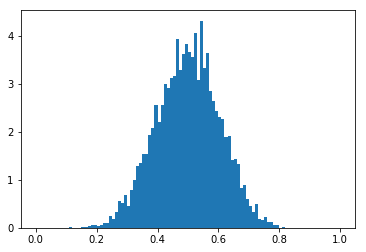

In [56]:
# 사전분포 : 균일분포
r=beta.rvs(1,1,size=5000)
plt.hist(r,bins=100,normed=True, color='green',range=(0,1))
plt.show()
# 10번 성공, 10번 실패
r=beta.rvs(10,10,size=5000)
plt.hist(r,bins=100,normed=True, color='red',range=(0,1))
plt.show()
# 사후분포
r=beta.rvs(11,11,size=5000)
plt.hist(r,bins=100,normed=True,range=(0,1))
plt.show()

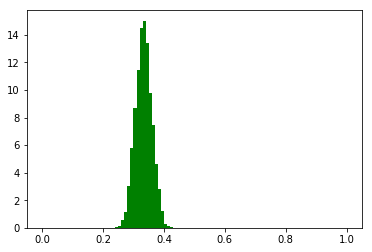

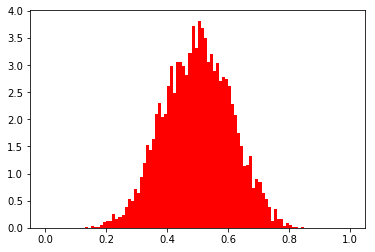

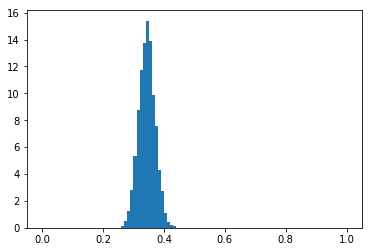

In [55]:
# 아주 강한 사전분포 : 베타분포
r=beta.rvs(100,200,size=5000)  # 사전분포의 믿음은 300번 시행 중 100번 성공한다.
plt.hist(r,bins=100,normed=True,color='green',range=(0,1))
plt.show()
# 10번 성공, 10번 실패  # 그러나 데이터의 결과는 10번 중 10번 시행이다.
r=beta.rvs(10,10,size=5000)
plt.hist(r,bins=100,normed=True,color='red',range=(0,1))
plt.show()
# 사후분포   # 사전분포의 영향으로 데이터의 결과를 충실히 반영하지 못한다.
r=beta.rvs(110,210,size=5000)
plt.hist(r,bins=100,normed=True,range=(0,1))
plt.show()

## 해석
- 신용구간 Hightest density interval